In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
churn = pd.read_csv("/Users/kensaroven/Desktop/Rotman Resources/RSM 8413 Machine Learning Analytics/Dataset_Class codes/churn.txt", sep =",")

In [3]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
churn.shape

(3333, 21)

In [5]:
churn.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

### Exploring Categorical Variables

In [7]:
# Summarize the Churn variable
churn["Churn?"].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

In [8]:
# Calculate proportion of churners
churn["Churn?"].value_counts(normalize = True) * 100

False.    85.508551
True.     14.491449
Name: Churn?, dtype: float64

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Churning Customers')

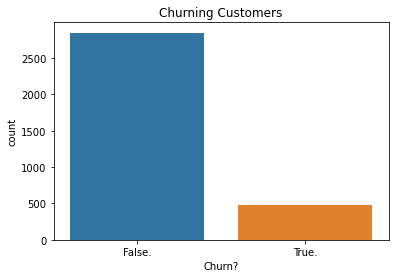

In [9]:
# Bar chart of variable Churn
ax = sns.countplot(churn["Churn?"]) 
ax.set_title("Churning Customers")

<AxesSubplot:title={'center':'Churning Customers'}>

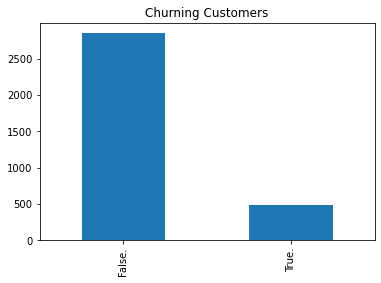

In [10]:
# in comparison: matplotlib
churn["Churn?"].value_counts().plot(kind='bar', title= "Churning Customers")

In [11]:
# do not add total margins for visualization
churn_crosstab = pd.crosstab(churn["Churn?"], churn["Int'l Plan"], margins=False)
churn_crosstab

Int'l Plan,no,yes
Churn?,,
False.,2664,186
True.,346,137


In [12]:
pd.crosstab(churn["Churn?"], churn["Int'l Plan"], margins=True)

Int'l Plan,no,yes,All
Churn?,,,
False.,2664,186,2850
True.,346,137,483
All,3010,323,3333


<AxesSubplot:xlabel="Int'l Plan", ylabel='count'>

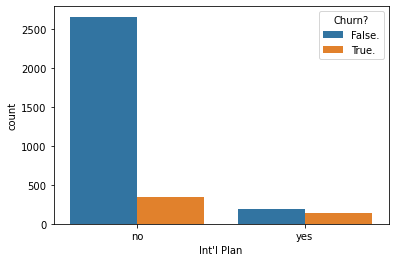

In [13]:
# seaborn does not (yet?) support stacked bar charts natively
sns.countplot(x="Int'l Plan", hue="Churn?", data=churn)

<AxesSubplot:xlabel="Int'l Plan">

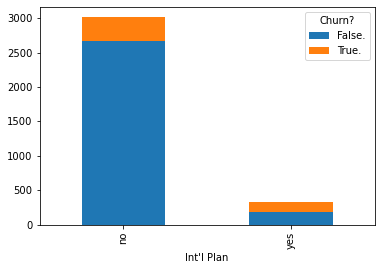

In [14]:
churn_crosstab = churn_crosstab.transpose()
churn_crosstab.plot(kind = 'bar', stacked = True)

In [15]:
churn_crosstab_norm = churn_crosstab.div(churn_crosstab.sum(axis=1), axis=0)

In [16]:
churn_crosstab_norm

Churn?,False.,True.
Int'l Plan,,
no,0.885050,0.114950
yes,0.575851,0.424149


<AxesSubplot:xlabel="Int'l Plan">

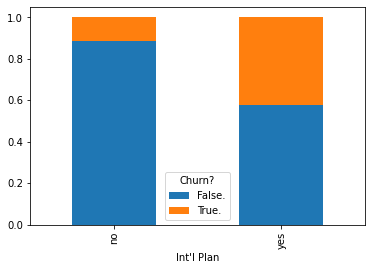

In [17]:
churn_crosstab_norm.plot(kind = 'bar', stacked = True)

In [18]:
churn.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


array([[<AxesSubplot:title={'center':'Account Length'}>,
        <AxesSubplot:title={'center':'Area Code'}>,
        <AxesSubplot:title={'center':'VMail Message'}>,
        <AxesSubplot:title={'center':'Day Mins'}>],
       [<AxesSubplot:title={'center':'Day Calls'}>,
        <AxesSubplot:title={'center':'Day Charge'}>,
        <AxesSubplot:title={'center':'Eve Mins'}>,
        <AxesSubplot:title={'center':'Eve Calls'}>],
       [<AxesSubplot:title={'center':'Eve Charge'}>,
        <AxesSubplot:title={'center':'Night Mins'}>,
        <AxesSubplot:title={'center':'Night Calls'}>,
        <AxesSubplot:title={'center':'Night Charge'}>],
       [<AxesSubplot:title={'center':'Intl Mins'}>,
        <AxesSubplot:title={'center':'Intl Calls'}>,
        <AxesSubplot:title={'center':'Intl Charge'}>,
        <AxesSubplot:title={'center':'CustServ Calls'}>]], dtype=object)

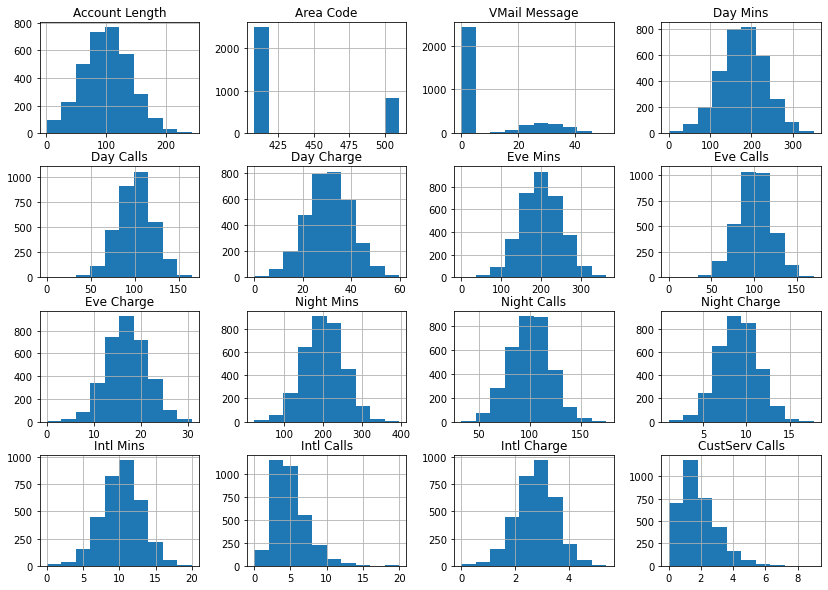

In [19]:
churn.hist(figsize = (14,10))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

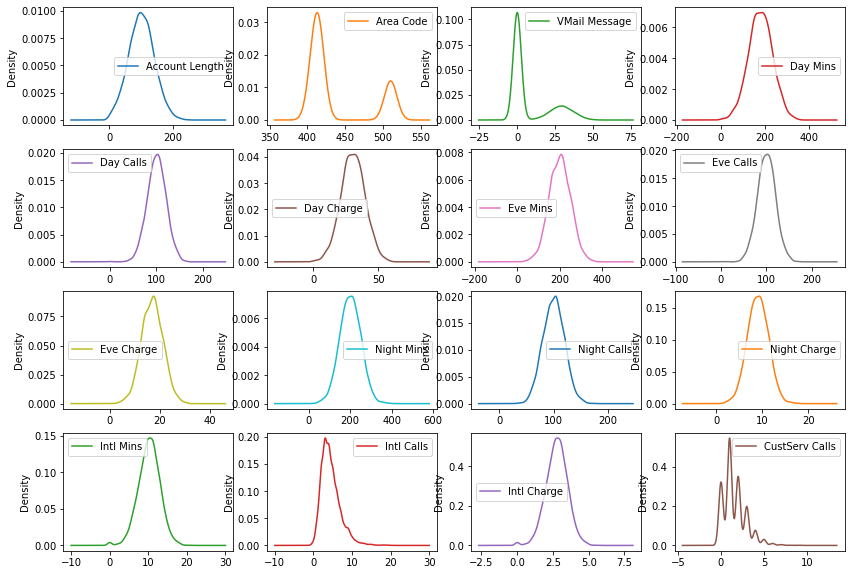

In [20]:
#Density plots
churn.plot(figsize = (14,10), kind = 'density', subplots = True, layout = (4,4), sharex = False)

<AxesSubplot:xlabel='CustServ Calls', ylabel='Density'>

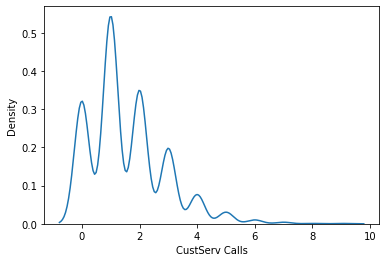

In [21]:
sns.kdeplot(churn["CustServ Calls"])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'Account Length'),
  Text(2, 0, 'Area Code'),
  Text(3, 0, 'VMail Message'),
  Text(4, 0, 'Day Mins'),
  Text(5, 0, 'Day Calls'),
  Text(6, 0, 'Day Charge'),
  Text(7, 0, 'Eve Mins'),
  Text(8, 0, 'Eve Calls'),
  Text(9, 0, 'Eve Charge'),
  Text(10, 0, 'Night Mins'),
  Text(11, 0, 'Night Calls'),
  Text(12, 0, 'Night Charge'),
  Text(13, 0, 'Intl Mins'),
  Text(14, 0, 'Intl Calls'),
  Text(15, 0, 'Intl Charge'),
  Text(16, 0, 'CustServ Calls')])

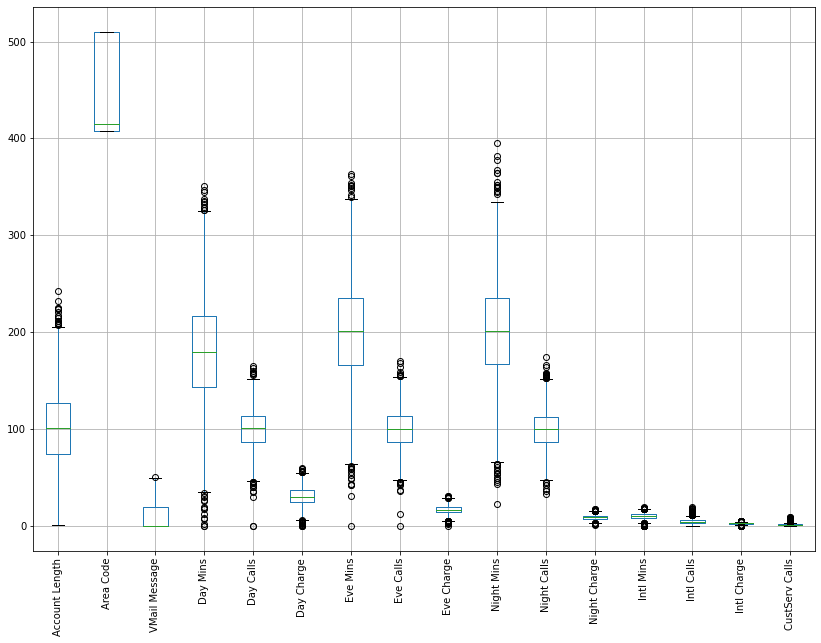

In [22]:
# Box and Whisker Plots
churn.boxplot(figsize=(14,10))
plt.xticks(rotation=90)

Account Length        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Area Code          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
VMail Message      AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Day Mins           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Day Calls            AxesSubplot(0.125,0.518913;0.168478x0.16413)
Day Charge        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Eve Mins          AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Eve Calls         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Eve Charge           AxesSubplot(0.125,0.321957;0.168478x0.16413)
Night Mins        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Night Calls       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Night Charge      AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Intl Mins               AxesSubplot(0.125,0.125;0.168478x0.16413)
Intl Calls           AxesSubplot(0.327174,0.125;0.168478x0.16413)
Intl Charge          AxesSubplot(0.529348,0.125;0.168478x0.16413)
CustServ C

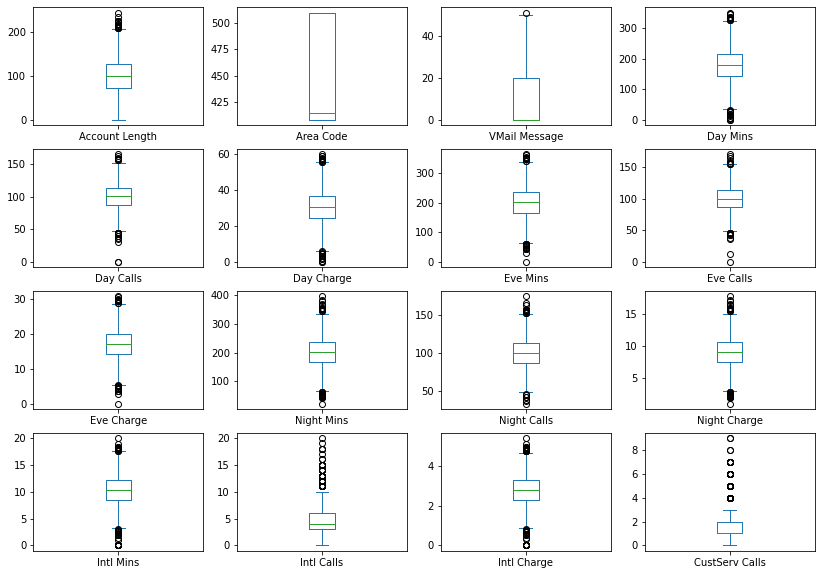

In [23]:
churn.plot(figsize=(14,10), kind='box', subplots=True, layout=(4,4),
sharex=False, sharey=False)

<AxesSubplot:xlabel='Churn?', ylabel='CustServ Calls'>

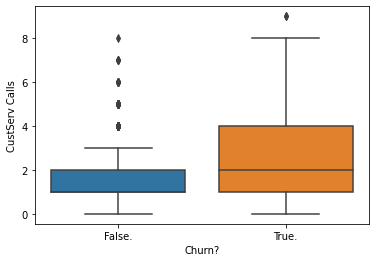

In [24]:
sns.boxplot(x = churn["Churn?"], y = churn["CustServ Calls"], data = churn)

## Explore Numerical Variables

In [25]:
# Separate variable Customer Service Calls by the two values of the target
churn_csc_T = churn[churn["Churn?"] == 'True.']['CustServ Calls']
churn_csc_F = churn[churn["Churn?"] == 'False.']['CustServ Calls']

([<matplotlib.axis.XTick at 0x7f8458700190>,
 [Text(0.45, 0, '0'),
  Text(1.4, 0, '1'),
  Text(2.35, 0, '2'),
  Text(3.3, 0, '3'),
  Text(4.25, 0, '4'),
  Text(5.2, 0, '5'),
  Text(6.1499999999999995, 0, '6'),
  Text(7.1, 0, '7'),
  Text(8.049999999999999, 0, '8'),
  Text(8.999999999999998, 0, '9')])

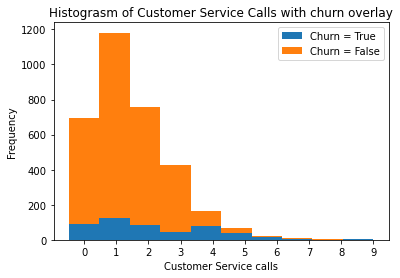

In [26]:
# Create a stacked histogram of the two variables
plt.hist([churn_csc_T, churn_csc_F], bins = 10, stacked = True)
plt.legend(['Churn = True', 'Churn = False'])
plt.title('Histograsm of Customer Service Calls with churn overlay')
plt.xlabel('Customer Service calls')
plt.ylabel('Frequency')
xlabels = np.arange(10) #labels
xpos = [x*0.95+0.45 for x in xlabels] #label locations
plt.xticks(xpos, xlabels)

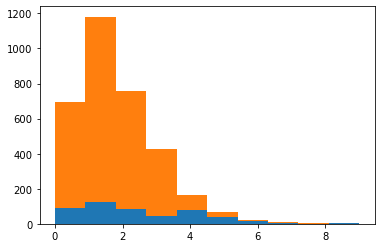

In [27]:
(n, bins, patches) = plt.hist([churn_csc_T, churn_csc_F], bins = 10,stacked = True)

In [28]:
n[1] = n[1] - n[0]
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None] 
ourbins = np.column_stack((bins[0:10], bins[1:11]))

([<matplotlib.axis.XTick at 0x7f847be22100>,
 [Text(0.0, 0, '0'),
  Text(0.95, 0, '1'),
  Text(1.9000000000000001, 0, '2'),
  Text(2.8499999999999996, 0, '3'),
  Text(3.8, 0, '4'),
  Text(4.75, 0, '5'),
  Text(5.699999999999999, 0, '6'),
  Text(6.6499999999999995, 0, '7'),
  Text(7.599999999999999, 0, '8'),
  Text(8.549999999999999, 0, '9')])

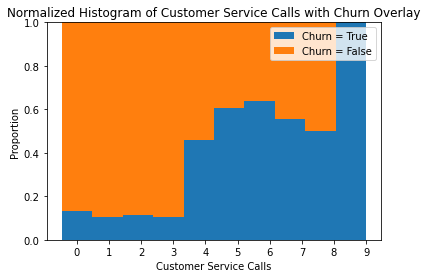

In [29]:
plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1] - ourbins[:, 0])
plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1] - ourbins[:, 0],bottom = n_norm[:,0])
plt.legend(['Churn = True', 'Churn = False'])
plt.title('Normalized Histogram of Customer Service Calls with Churn Overlay')
plt.xlabel('Customer Service Calls') 
plt.ylabel('Proportion')
xpos = [x-0.45 for x in xpos] 
plt.xticks(xpos, xlabels)

### Exploring Multivariate Relationships

<AxesSubplot:xlabel='Day Mins', ylabel='Eve Mins'>

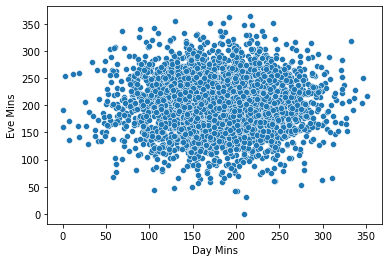

In [30]:
sns.scatterplot(x = "Day Mins", y = "Eve Mins", data = churn)

<AxesSubplot:xlabel='Day Mins', ylabel='Eve Mins'>

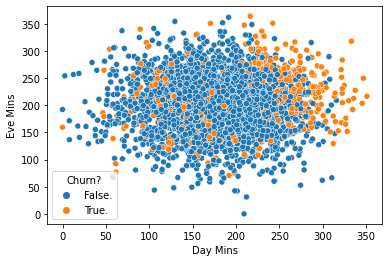

In [31]:
sns.scatterplot(x = "Day Mins", y = "Eve Mins", hue = "Churn?", data =
churn)

<AxesSubplot:xlabel='Day Mins', ylabel='CustServ Calls'>

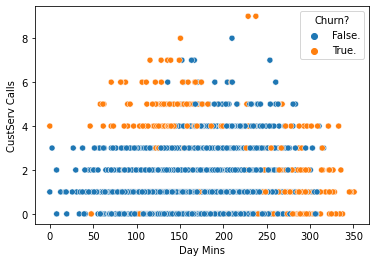

In [32]:
sns.scatterplot(x = "Day Mins", y = "CustServ Calls", hue = "Churn?", data = churn)

### Binning based on Predictive Value

In [33]:
churn['Eve Mins binned'] = pd.cut(x = churn['Eve Mins'], bins = [0, 160.01, 240.01, 400], labels=["Low", "Medium", "High"], right = False)

<AxesSubplot:title={'center':'Bar Graph of Evening Minutes (Binned) with Churn Overlay'}, xlabel='Churn?'>

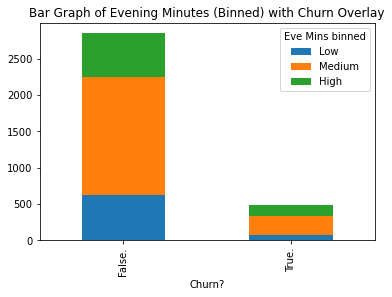

In [34]:
churn_crosstab = pd.crosstab(churn["Churn?"], churn["Eve Mins binned"])
churn_crosstab.plot(kind = 'bar', stacked = True, title = 'Bar Graph of Evening Minutes (Binned) with Churn Overlay')

<AxesSubplot:title={'center':'Bar Graph ofEvening Minutes (Binned) with Churn Overlay'}, xlabel='Eve Mins binned'>

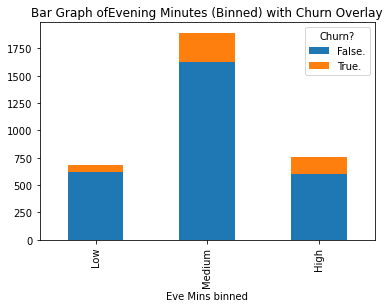

In [35]:
# and pivoted:
churn_crosstab = pd.crosstab(churn["Eve Mins binned"], churn["Churn?"])

churn_crosstab.plot(kind = 'bar', stacked = True, title = 'Bar Graph ofEvening Minutes (Binned) with Churn Overlay')

## Correlated Predictor Variables

array([[<AxesSubplot:xlabel='Account Length', ylabel='Account Length'>,
        <AxesSubplot:xlabel='Area Code', ylabel='Account Length'>,
        <AxesSubplot:xlabel='VMail Message', ylabel='Account Length'>,
        <AxesSubplot:xlabel='Day Mins', ylabel='Account Length'>,
        <AxesSubplot:xlabel='Day Calls', ylabel='Account Length'>,
        <AxesSubplot:xlabel='Day Charge', ylabel='Account Length'>,
        <AxesSubplot:xlabel='Eve Mins', ylabel='Account Length'>,
        <AxesSubplot:xlabel='Eve Calls', ylabel='Account Length'>,
        <AxesSubplot:xlabel='Eve Charge', ylabel='Account Length'>,
        <AxesSubplot:xlabel='Night Mins', ylabel='Account Length'>,
        <AxesSubplot:xlabel='Night Calls', ylabel='Account Length'>,
        <AxesSubplot:xlabel='Night Charge', ylabel='Account Length'>,
        <AxesSubplot:xlabel='Intl Mins', ylabel='Account Length'>,
        <AxesSubplot:xlabel='Intl Calls', ylabel='Account Length'>,
        <AxesSubplot:xlabel='Intl Charge', yla

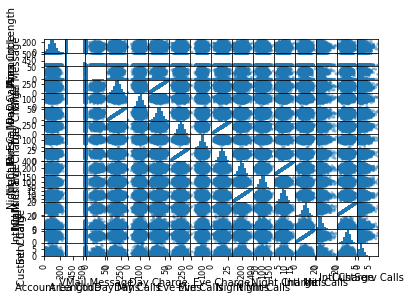

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(churn)

In [37]:
# correlation matrix
correlations = churn.corr()
print(correlations)

                Account Length  Area Code  VMail Message  Day Mins  Day Calls  \
Account Length        1.000000  -0.012463      -0.004628  0.006216   0.038470   
Area Code            -0.012463   1.000000      -0.001994 -0.008264  -0.009646   
VMail Message        -0.004628  -0.001994       1.000000  0.000778  -0.009548   
Day Mins              0.006216  -0.008264       0.000778  1.000000   0.006750   
Day Calls             0.038470  -0.009646      -0.009548  0.006750   1.000000   
Day Charge            0.006214  -0.008264       0.000776  1.000000   0.006753   
Eve Mins             -0.006757   0.003580       0.017562  0.007043  -0.021451   
Eve Calls             0.019260  -0.011886      -0.005864  0.015769   0.006462   
Eve Charge           -0.006745   0.003607       0.017578  0.007029  -0.021449   
Night Mins           -0.008955  -0.005825       0.007681  0.004323   0.022938   
Night Calls          -0.013176   0.016522       0.007123  0.022972  -0.019557   
Night Charge         -0.0089

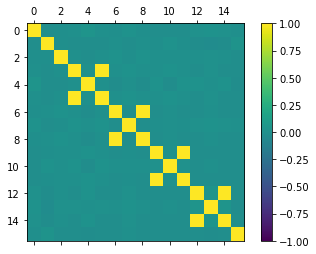

In [38]:
# plot correlation matrix (generic)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1) 
fig.colorbar(cax)

In [39]:
# change the tick labels
ticks = range(0,16,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
numeric_columns = churn.select_dtypes(include='number') 
ax.set_xticklabels(numeric_columns, rotation=90) 
ax.set_yticklabels(numeric_columns)

[Text(0, 0, 'Account Length'),
 Text(0, 1, 'Area Code'),
 Text(0, 2, 'VMail Message'),
 Text(0, 3, 'Day Mins'),
 Text(0, 4, 'Day Calls'),
 Text(0, 5, 'Day Charge'),
 Text(0, 6, 'Eve Mins'),
 Text(0, 7, 'Eve Calls'),
 Text(0, 8, 'Eve Charge'),
 Text(0, 9, 'Night Mins'),
 Text(0, 10, 'Night Calls'),
 Text(0, 11, 'Night Charge'),
 Text(0, 12, 'Intl Mins'),
 Text(0, 13, 'Intl Calls'),
 Text(0, 14, 'Intl Charge'),
 Text(0, 15, 'CustServ Calls')]

In [40]:
pip install sweetviz

     |████████████████████████████████| 15.1 MB 1.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install autoviz

     |████████████████████████████████| 64 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 12.9 MB 673 kB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 636 kB 328 kB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 160 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 216 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 2.9 MB/s eta 0:00:01


  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=f5aeab9aaff5f488c1f0dcc530070e577f83f12e1a8287bf8940cb6ed9746024
  Stored in directory: /Users/kensaroven/Library/Caches/pip/wheels/b0/4a/c8/9c580a0ea94dea641b8023456a1b178a7e4509d992224ed4aa
Successfully built emoji
  Attempting uninstall: setuptools
    Found existing installation: setuptools 61.2.0
    Uninstalling setuptools-61.2.0:
      Successfully uninstalled setuptools-61.2.0
  Attempting uninstall: panel
    Found existing installation: panel 0.13.0
    Uninstalling panel-0.13.0:
      Successfully uninstalled panel-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-projec

In [50]:
import sweetviz as sv
churn["Churn?"] = np.where(churn["Churn?"] == "True.", True, False)
analyze_report = sv.analyze(churn, "Churn?")

                                             |      | [  0%]   00:00 -> (? left)

In [51]:
# can also compare training/test sets 
analyze_report.show_html('report.html', open_browser=True)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
